In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2007(2) 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_072(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_h.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m072=Minuit(twi_minus_loglikelihood_072,log_A=0,log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(1,4),limit_log_f_b=(-11,-6),limit_alpha_H=(1.0,5.0),limit_log_poisson=(0,3),
         errordef=1)
'''
不限制参数log_A、log_f_b时,反而可以得到比较小的chi2值
限制limit_log_A=(1,3)，limit_log_f_b=(-10,-6)时，两个参数都收敛到区间边缘，但chi2更小（比不限制更小）
'''

m072.migrad()

pprint(m072.fval)

FCN = 9641.22695336976 
 TOTAL NCALL = 395 
 NCALLS = 395 
 
 
 EDM = 4.659323461462666e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,2.02416,1.71712,,,1,4,No
1,log_f_b,-8.4963,3.0277,,,-11,-6,No
2,alpha_H,2.1415,0.599206,,,1,5,No
3,log_poisson,1.30303,0.0128261,,,0,3,No


9641.22695336976


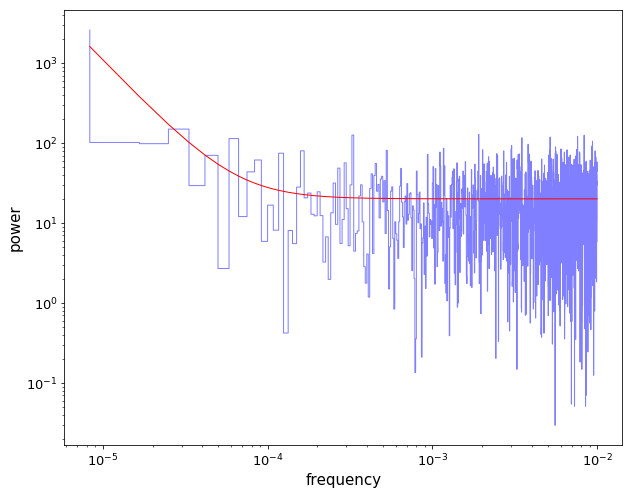

In [4]:
perdata072 = pd.read_csv("perlist072_h.csv")
f_072 = perdata072['f']
per_072 = perdata072['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m072.values[0],m072.values[1],m072.values[2],m072.values[3]

model_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_072.append(((f_072[i]**(-alpha_L))/(1+(f_072[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(2) 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_072(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_h.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n072=Minuit(twi_minus_loglikelihood_nobreak_072,log_A=-8,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-9,-3),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n072.migrad()

print(n072.fval)

FCN = 9641.226907750237 
 TOTAL NCALL = 221 
 NCALLS = 221 
 
 
 EDM = 4.351105347658741e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-7.67869,1.87826,,,-9,-3,No
1,alpha,2.14276,0.460191,,,1,5,No
2,log_poisson,1.303,0.0127541,,,-1,3,No


9641.226907750237


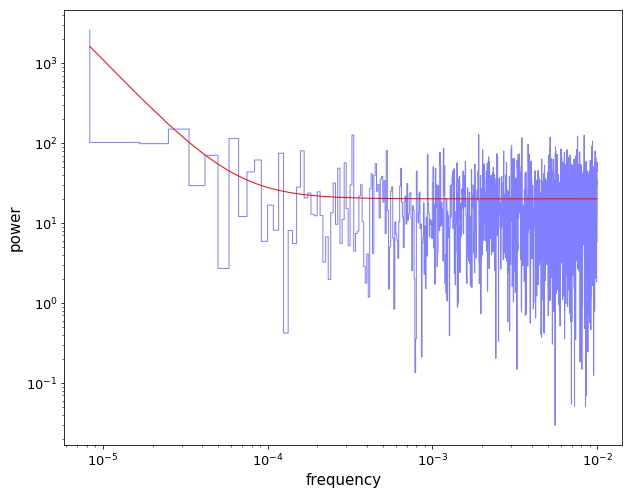

In [7]:
log_A,alpha,log_poisson = n072.values[0],n072.values[1],n072.values[2]

model_nob_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_nob_072.append((f_072[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_nob_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-4.5619523007189855e-05


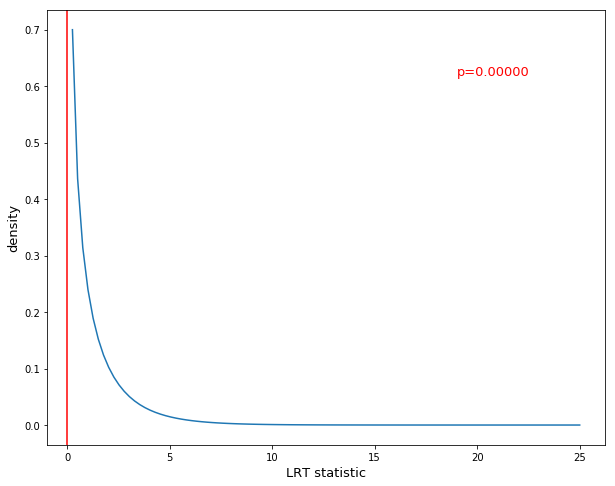

In [8]:
import scipy.stats as stats

# LRT statistic
T = n072.fval-m072.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2012(2) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_121(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata121 = pd.read_csv("perlist121_h.csv")
    f = perdata121['f']
    per = perdata121['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata121)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m121=Minuit(twi_minus_loglikelihood_121,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0), limit_log_f_b=(-7,0),limit_alpha_H=(2,15),limit_log_poisson=(0,3),
         errordef=1)

m121.migrad()

pprint(m121.fval)

FCN = 5369.888938165732 
 TOTAL NCALL = 167 
 NCALLS = 167 
 
 
 EDM = 1.026790889204543e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.29074,0.00444408,,,-5,0,No
1,log_f_b,-0.00347128,4.92865,,,-7,0,No
2,alpha_H,5.32467,9.7879,,,2,15,No
3,log_poisson,0.544201,0.00226424,,,0,3,No


5369.888938165732


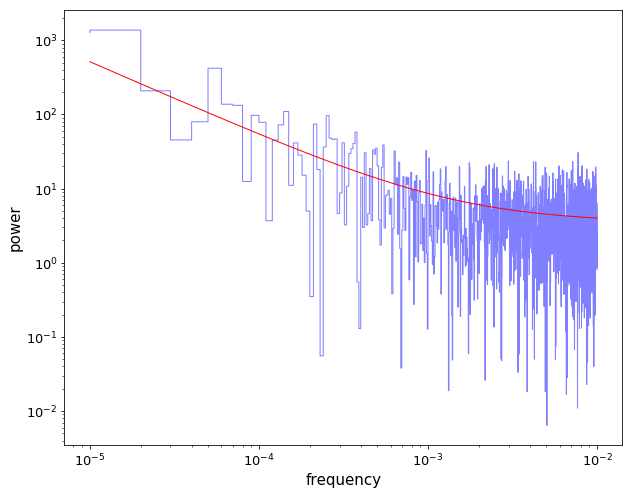

In [11]:
perdata121 = pd.read_csv("perlist121_h.csv")
f_121 = perdata121['f']
per_121 = perdata121['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m121.values[0],m121.values[1],m121.values[2],m121.values[3]

model_121 = []
f_length_121 = len(f_121)
for i in range(f_length_121):
    model_121.append(((f_121[i]**(-alpha_L))/(1+(f_121[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_121, per_121, color="b", alpha=0.5, linewidth=1)
plt.plot(f_121, model_121, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2012(2) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_121(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata121 = pd.read_csv("perlist121_h.csv")
    f = perdata121['f']
    per = perdata121['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata121)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n121=Minuit(twi_minus_loglikelihood_nobreak_121,log_A=-2,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,5),limit_alpha=(0.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n121.migrad()

pprint(n121.fval)

FCN = 5351.910293939998 
 TOTAL NCALL = 247 
 NCALLS = 247 
 
 
 EDM = 8.859750806610402e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.89139,0.413764,,,-5,5,No
1,alpha,1.45597,0.117487,,,0,5,No
2,log_poisson,0.624828,0.0200102,,,0,3,No


5351.910293939998


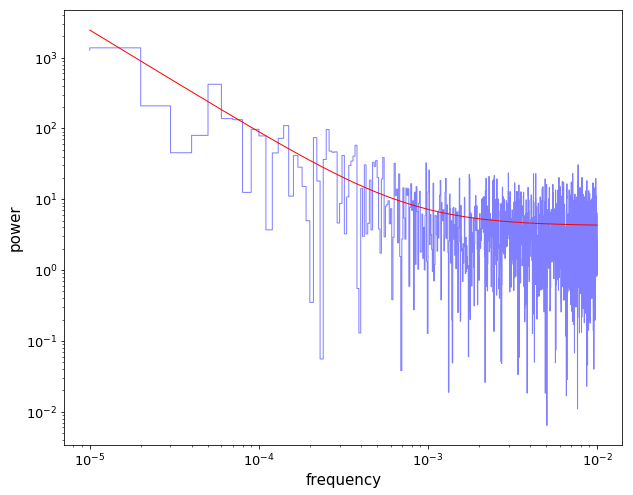

In [14]:
log_A,alpha,log_poisson = n121.values[0],n121.values[1],n121.values[2]

model_nob_121 = []
f_length_121 = len(f_121)
for i in range(f_length_121):
    model_nob_121.append((f_121[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_121, per_121, color="b", alpha=0.5, linewidth=1)
plt.plot(f_121, model_nob_121, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-17.97864422573366


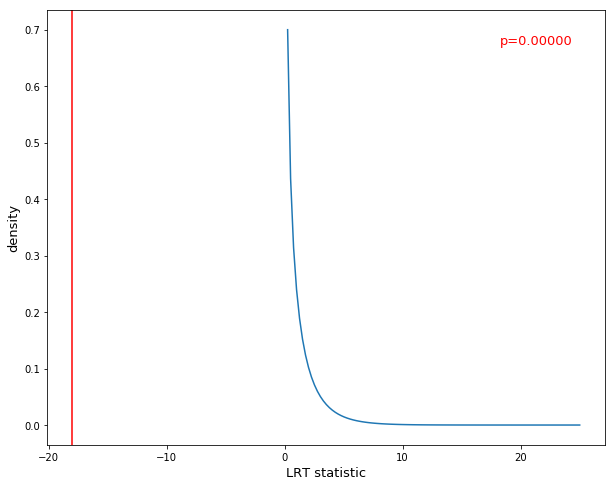

In [15]:
import scipy.stats as stats

# LRT statistic
T = n121.fval-m121.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2013(2) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_132(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata132 = pd.read_csv("perlist132_h.csv")
    f = perdata132['f']
    per = perdata132['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata132)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m132=Minuit(twi_minus_loglikelihood_132,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,5), limit_log_f_b=(-8,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

m132.migrad()

pprint(m132.fval)

FCN = 5266.227566582428 
 TOTAL NCALL = 361 
 NCALLS = 361 
 
 
 EDM = 5.675099914349845e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.985861,0.294882,,,-5,5,No
1,log_f_b,-4.08533,0.524937,,,-8,-2,No
2,alpha_H,1.95635,0.191194,,,1,5,No
3,log_poisson,0.32081,0.0276743,,,-1,3,No


5266.227566582428


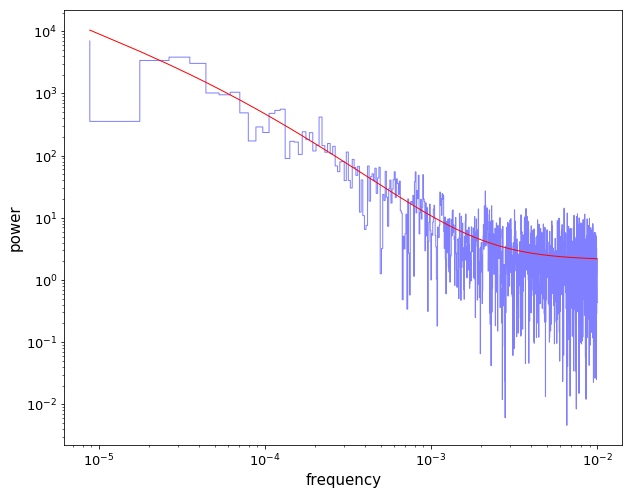

In [18]:
perdata132 = pd.read_csv("perlist132_h.csv")
f_132 = perdata132['f']
per_132 = perdata132['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m132.values[0],m132.values[1],m132.values[2],m132.values[3]

model_132 = []
f_length_132 = len(f_132)
for i in range(f_length_132):
    model_132.append(((f_132[i]**(-alpha_L))/(1+(f_132[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_132, per_132, color="b", alpha=0.5, linewidth=1)
plt.plot(f_132, model_132, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2013(2) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_132(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata132 = pd.read_csv("perlist132_h.csv")
    f = perdata132['f']
    per = perdata132['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata132)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n132=Minuit(twi_minus_loglikelihood_nobreak_132,log_A=-5,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-6,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(-1,3),
         errordef=1)

n132.migrad()

pprint(n132.fval)

FCN = 5268.979935622686 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 6.137717586803664e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-4.26759,0.250054,,,-6,-2,No
1,alpha,1.73471,0.0776857,,,1,5,No
2,log_poisson,0.29757,0.0257464,,,-1,3,No


5268.979935622686


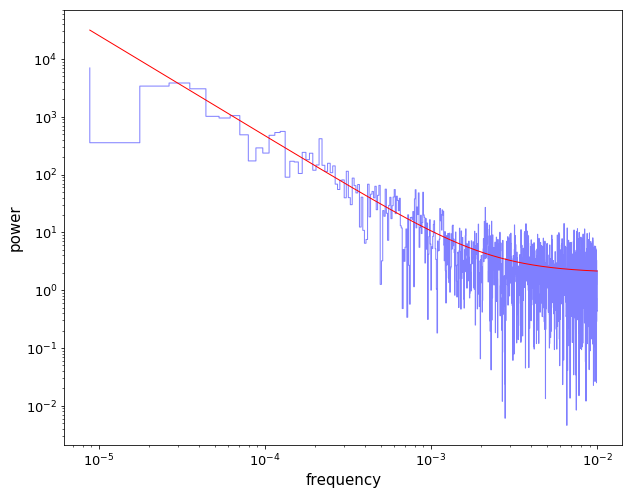

In [21]:
log_A,alpha,log_poisson = n132.values[0],n132.values[1],n132.values[2]

model_nob_132 = []
f_length_132 = len(f_132)
for i in range(f_length_132):
    model_nob_132.append((f_132[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_132, per_132, color="b", alpha=0.5, linewidth=1)
plt.plot(f_132, model_nob_132, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

2.7523690402576904


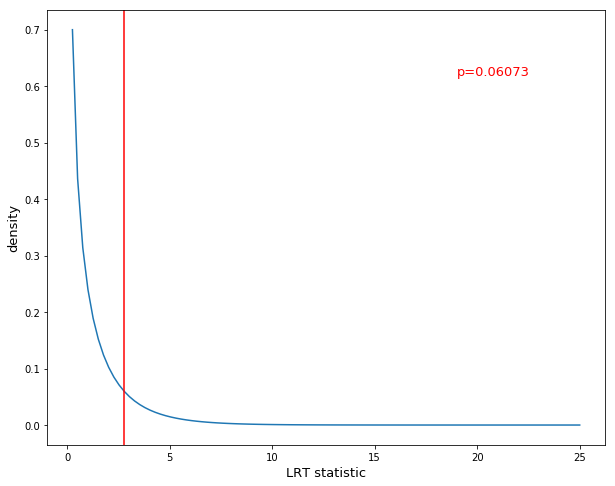

In [22]:
import scipy.stats as stats

# LRT statistic
T = n132.fval-m132.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data072 = pd.read_csv("energy_ngc1365_072.csv")  
x072 = data072['x']
y072 = data072['y']
xerr072 = data072['xerr']
yerr072 = data072['yerr']

data121 = pd.read_csv("energy_ngc1365_121.csv")  
x121 = data121['x']
y121 = data121['y']
xerr121 = data121['xerr']
yerr121 = data121['yerr']

data132 = pd.read_csv("energy_ngc1365_132.csv")  
x132 = data132['x']
y132 = data132['y']
xerr132 = data132['xerr']
yerr132 = data132['yerr']

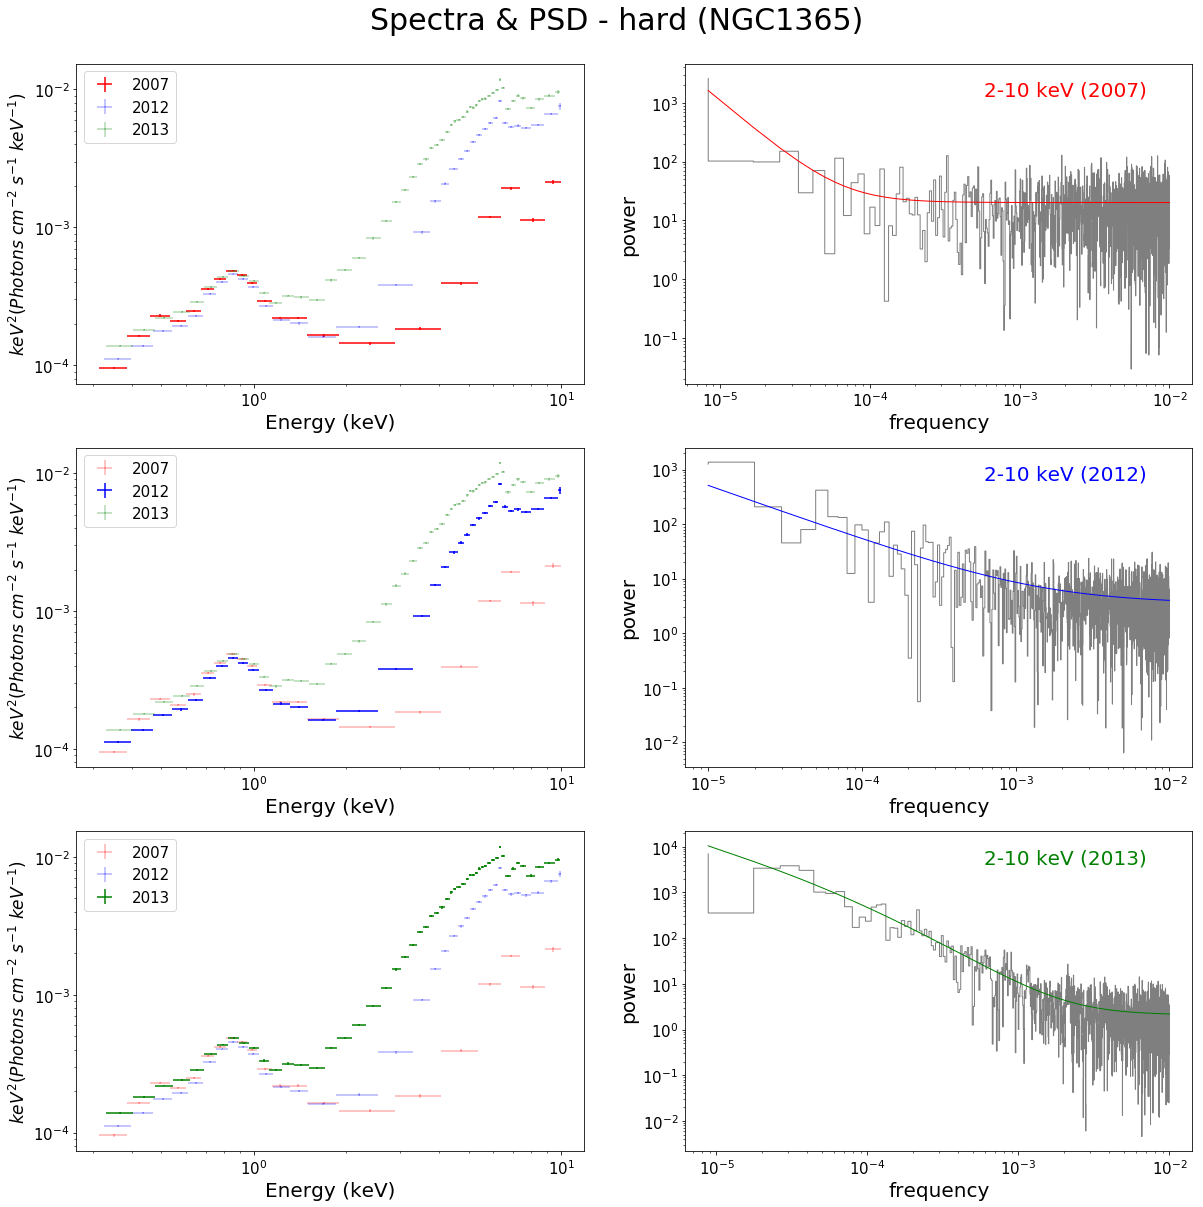

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)


ax1.loglog()
ax1.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',r', label='2007')
ax1.errorbar(x121, y121, yerr=yerr121, xerr=xerr121, fmt=',b', alpha=0.3, label='2012')
ax1.errorbar(x132, y132, yerr=yerr132, xerr=xerr132, fmt=',g', alpha=0.3, label='2013')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',r', alpha=0.3, label='2007')
ax3.errorbar(x121, y121, yerr=yerr121, xerr=xerr121, fmt=',b', label='2012')
ax3.errorbar(x132, y132, yerr=yerr132, xerr=xerr132, fmt=',g', alpha=0.3, label='2013')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',r', alpha=0.3, label='2007')
ax5.errorbar(x121, y121, yerr=yerr121, xerr=xerr121, fmt=',b', alpha=0.3, label='2012')
ax5.errorbar(x132, y132, yerr=yerr132, xerr=xerr132, fmt=',g', label='2013')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_072, per_072, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_072, model_072, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"2-10 keV (2007)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_121, per_121, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_121, model_121, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"2-10 keV (2012)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_132, per_132, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_132, model_132, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"2-10 keV (2013)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - hard (NGC1365)", x=0.5, y=0.92, fontsize=30)
plt.show()